In [17]:
import gc
import os
from pathlib import Path
import random
import sys

from tqdm.notebook import tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML

# --- plotly ---
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

# --- models ---
from sklearn import preprocessing
from sklearn.model_selection import KFold
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

In [18]:
RESPATH = "/Users/helen/Downloads/Feb18_res50_1e-4_aug/"
resdir = Path(RESPATH)
res_df = pd.read_csv(resdir/'log.csv')
res_df.head()

,epoch,iteration,train/loss,train/loss_grapheme,train/loss_vowel,train/loss_consonant,train/acc_grapheme,train/acc_vowel,train/acc_consonant,train/recall,...,val/loss_grapheme,val/loss_vowel,val/loss_consonant,val/acc_grapheme,val/acc_vowel,val/acc_consonant,val/recall,lr,elapsed_time,mode
0,0,160672,5.233831,3.252290,1.113428,0.868112,0.358208,0.665611,0.786005,0.424936,...,1.398785,0.381306,0.334244,0.746365,0.930343,0.930890,0.762833,0.001,1127.253484,11
1,1,321344,3.022911,1.941378,0.619412,0.462120,0.628230,0.797202,0.889944,0.635046,...,0.789693,0.199818,0.204542,0.857150,0.957429,0.944757,0.856509,0.001,2251.644768,11
2,2,482016,2.666504,1.752041,0.521823,0.392640,0.664198,0.823728,0.904346,0.671296,...,0.637158,0.150629,0.139946,0.879232,0.966117,0.961238,0.878910,0.001,3363.611220,11
3,3,642688,2.503132,1.663976,0.476349,0.362806,0.678146,0.832939,0.910040,0.682414,...,0.594365,0.152257,0.132049,0.889887,0.960989,0.961910,0.888016,0.001,4471.201506,11
4,4,803360,2.407262,1.610045,0.451905,0.345312,0.686137,0.838261,0.914167,0.690929,...,0.536894,0.120278,0.121784,0.902410,0.970300,0.964823,0.898813,0.001,5571.246081,11


In [19]:
%matplotlib inline
def plot_loss(df, title, epoch):
    plt.style.use('ggplot')
    plt.figure()
    plt.plot(np.arange(0, epoch), df['train/loss'].values, label='train_loss')
    plt.plot(np.arange(0, epoch), df['train/loss_grapheme'].values, label='train_root_loss')
    plt.plot(np.arange(0, epoch), df['train/loss_vowel'].values, label='train_vowel_loss')
    plt.plot(np.arange(0, epoch), df['train/loss_consonant'].values, label='train_consonant_loss')

    plt.plot(np.arange(0, epoch), df['val/loss'].values, label='val_loss')    
    plt.plot(np.arange(0, epoch), df['val/loss_grapheme'].values, label='val_root_loss')
    plt.plot(np.arange(0, epoch), df['val/loss_vowel'].values, label='val_vowel_loss')
    plt.plot(np.arange(0, epoch), df['val/loss_consonant'].values, label='val_consonant_loss')
    
    plt.title(title)
    plt.xlabel('Epoch #')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

def plot_acc(df, title, epoch):
    plt.style.use('ggplot')
    plt.figure()
    plt.plot(np.arange(0, epoch), df['train/acc_grapheme'].values, label='train_root_acc')
    plt.plot(np.arange(0, epoch), df['train/acc_vowel'].values, label='train_vowel_accuracy')
    plt.plot(np.arange(0, epoch), df['train/acc_consonant'].values, label='train_consonant_accuracy')
    
    plt.plot(np.arange(0, epoch), df['val/acc_grapheme'].values, label='val_root_acc')
    plt.plot(np.arange(0, epoch), df['val/acc_vowel'].values, label='val_vowel_accuracy')
    plt.plot(np.arange(0, epoch), df['val/acc_consonant'].values, label='val_consonant_accuracy')
    plt.title(title)
    plt.xlabel('Epoch #')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

In [20]:
def plot_recall(df, title, epochs):
    plt.style.use('ggplot')
    plt.figure()
    plt.plot(np.arange(0, epochs), df['train/recall'].values, label='train_recall')
    plt.plot(np.arange(0, epochs), df['val/recall'].values, label='val_recall')
    plt.title(title)
    plt.xlabel('Epoch #')
    plt.ylabel('Recall')
    plt.legend(loc='lower right')
    plt.show()

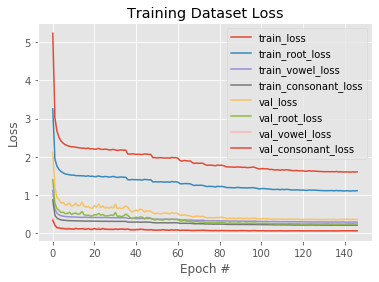

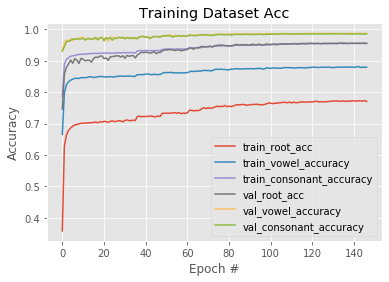

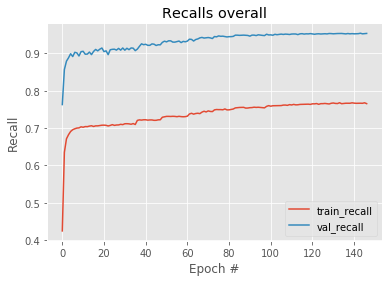

In [21]:
n_epoch = len(res_df)
plot_loss(res_df, 'Training Dataset Loss' , n_epoch)
plot_acc(res_df, 'Training Dataset Acc', n_epoch)
plot_recall(res_df, 'Recalls overall', n_epoch)